In [ ]:
# step1：データの読み込み・確認
import pandas as pd

# 1-1：customer_data.csvファイルを読み込んでdfに代入
df = pd.read_csv('customer_data.csv')

# 1-2：日本語の列名をnames_JPNに入れて、列名を日本語に変換
names_JPN = ['年齢','年収','月あたり来店回数','平均購入金額','優良1or一般0']
df.columns = names_JPN

# 1-3：先頭から5行目までのデータを表示
df.head()

,年齢,年収,月あたり来店回数,平均購入金額,優良1or一般0
0,69,11860000,5,20738,1
1,62,11520000,6,25177,1
2,19,10990000,7,16190,1
3,43,10700000,5,41447,1
4,46,10560000,0,3557,0


In [ ]:
# 1-4：欠損がないか確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   年齢        100 non-null    int64
 1   年収        100 non-null    int64
 2   月あたり来店回数  100 non-null    int64
 3   平均購入金額    100 non-null    int64
 4   優良1or一般0  100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [ ]:
# 1-5：統計量の表示
df.describe()

,年齢,年収,月あたり来店回数,平均購入金額,優良1or一般0
count,100.0000,1.000000e+02,100.000000,100.000000,100.000000
mean,42.9200,5.731700e+06,4.080000,16513.040000,0.280000
std,12.0903,2.077982e+06,3.040734,11155.316836,0.451261
min,19.0000,2.620000e+06,0.000000,1301.000000,0.000000
25%,33.7500,4.255000e+06,1.750000,7723.250000,0.000000
50%,42.5000,5.300000e+06,3.000000,15412.000000,0.000000
75%,52.2500,6.461250e+06,6.000000,21833.500000,1.000000
max,69.0000,1.186000e+07,11.000000,46525.000000,1.000000


In [ ]:
pip install japanize-matplotlib

array([[<Axes: title={'center': '年齢'}>, <Axes: title={'center': '年収'}>],
       [<Axes: title={'center': '月あたり来店回数'}>,
        <Axes: title={'center': '平均購入金額'}>],
       [<Axes: title={'center': '優良1or一般0'}>, <Axes: >]], dtype=object)

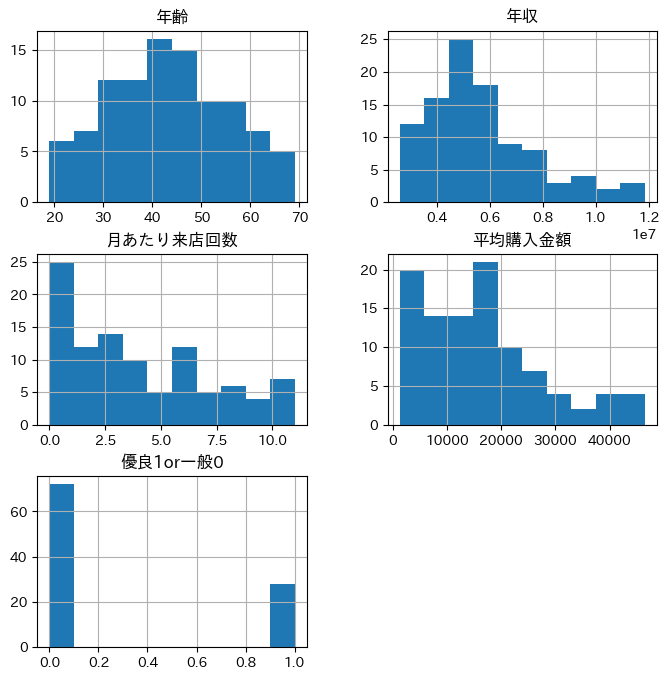

In [ ]:
# 1-6:ヒストグラムによる可視化
import seaborn as sns      # データの可視化ライブラリ
import japanize_matplotlib # グラフのタイトルに日本語を使えるように

# CSVデータをヒストで可視化
df.hist(bins=10, figsize=(8, 8)) # bins：ヒストグラムのバーの本数

In [ ]:
# step2：特徴量の選択
# 有料会員の判定に必要なさそうな、年齢列の削除
df = df.drop(columns = ['年齢'])
df.head() #先頭5行表示

,年収,月あたり来店回数,平均購入金額,優良1or一般0
0,11860000,5,20738,1
1,11520000,6,25177,1
2,10990000,7,16190,1
3,10700000,5,41447,1
4,10560000,0,3557,0


In [ ]:
# step2.5：取得したサンプルデータを、学習データとテストデータに分割

# 与えるデータ）Xは年収, 月あたり来店回数, 平均購入金額 列
X = df[['年収', '月あたり来店回数', '平均購入金額']]   # 複数列なので2重[]

# 予測する値）yは優良1or一般0の列
y = df['優良1or一般0']


# データを分割するための関数をインポート
from sklearn.model_selection import train_test_split

# Xとyをそれぞれ、学習データ(train)7 対 テストデータ3に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(70, 3) (30, 3) (70,) (30,)


In [ ]:
# step3：モデル構築

#3-1：各モデルをインポート → インスタンスを作成 → 学習データで学習を実行
# ①ロジスティック回帰 (LogisticRegression)クラスをインポート
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=3)   # モデルのインスタンスを作成
                                          # max_iter=1000：最適化（学習）を繰り返す最大回数
log_model.fit(X_train, y_train)           # 学習データで学習を実行

# ②決定木 (DecisionTreeClassifier)クラスをインポート
from sklearn.tree import DecisionTreeClassifier
tree_model =  DecisionTreeClassifier(random_state=3)
tree_model.fit(X_train, y_train)

# ③ランダムフォレスト (RandomForestClassifier)クラスをインポート
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=3)
rf_model.fit(X_train, y_train)


# 3-2：モデルの予測を評価するための関数をインポート
#  ・正解率 (accuracy_score)
from sklearn.metrics import accuracy_score
# ・適合率・再現率 (precision, recall)
from sklearn.metrics import precision_score, recall_score
# ・混同行列 (confusion_matrix)
from sklearn.metrics import confusion_matrix


In [ ]:
# step4：評価  ①ロジスティック回帰での評価
y_pred = log_model.predict(X_test) # テストデータを使ってy（優良一般）を予測
#print(y_pred) # 予測のy（優良一般）を表示
#print(y_test) # 実際のy（優良一般）を表示

#評価指標を出力
print(f"正解率：{accuracy_score(y_test, y_pred)}") # y_test全ての内、y_predのデータがいくつヒットしたかという割合が正解率
print(f"適合率：{precision_score(y_test, y_pred)}") # 予測を優良とした中で実際に優良だった割合(TP / FP+TP)
print(f"再現率：{recall_score(y_test, y_pred)}")    # 実際に優良であるデータのうち、どれだけ正しく優良と予測できたかの割合
                                                    # (TP / FN+TP)
print(f"混同行列：{confusion_matrix(y_test, y_pred)}")
  # [[TN, FP],
  #  [FN, TP]]
    # TN: 本当は0で正しく0と予測した件数　 # FP: 本当は0だけど  1と予測した件数
    # FN: 本当は1だけど  0と予測した件数   # TP: 本当は1で正しく1と予測した件数

# print(f"学習データでの正解率：  {log_model.score(X_train, y_train)}")
# print(f"テストデータでの正解率：{log_model.score(X_test,   y_test)}")


正解率：0.7333333333333333
適合率：0.3333333333333333
再現率：0.6
混同行列：[[19  6]
 [ 2  3]]
学習データでの正解率：  0.7285714285714285
テストデータでの正解率：0.7333333333333333


In [ ]:
# step4-②決定木での評価
y_pred = tree_model.predict(X_test) # テストデータを使ってy（優良一般）を予測
#print(y_pred)
#print(y_test) #実際のy

# 評価指標を出力
print(f"正解率：{accuracy_score(y_test, y_pred)}")
print(f"適合率：{precision_score(y_test, y_pred)}")
print(f"再現率：{recall_score(y_test, y_pred)}")
print(f"混同行列：{confusion_matrix(y_test, y_pred)}")

# print(f"学習データでの正解率：  {tree_model.score(X_train, y_train)}")
# print(f"テストデータでの正解率：{tree_model.score(X_test,   y_test)}")

正解率：0.8333333333333334
適合率：0.5
再現率：0.6
混同行列：[[22  3]
 [ 2  3]]
学習データでの正解率：  1.0
テストデータでの正解率：0.8333333333333334


In [ ]:
# step4-③ランダムフォレストでの評価
y_pred = rf_model.predict(X_test) # テストデータを使ってy（優良一般）を予測
#print(y_pred)
#print(y_test) #実際のy

#評価指標を出力
print(f"正解率：{accuracy_score(y_test, y_pred)}")
print(f"適合率：{precision_score(y_test, y_pred)}")
print(f"再現率：{recall_score(y_test, y_pred)}")
print(f"混同行列：{confusion_matrix(y_test, y_pred)}")

# print(f"学習データでの正解率：  {rf_model.score(X_train, y_train)}")
# print(f"テストデータでの正解率：{rf_model.score(X_test,   y_test)}")

正解率：0.9
適合率：0.75
再現率：0.6
混同行列：[[24  1]
 [ 2  3]]
学習データでの正解率：  1.0
テストデータでの正解率：0.9


In [ ]:
# step5：予測する関数を作って実行（ランダムフォレスト）全部一番率が高かった
def customer_type():
  income           = int(input("年収"))
  visits_per_month = int(input("来店回数/月"))
  avg_spend        = int(input("平均購入金額"))

  X_new = pd.DataFrame([[income, visits_per_month, avg_spend]], # 機械学習モデルに渡すためにDataFrame形式に変換
                         columns=['年収', '月あたり来店回数', '平均購入金額']) # DataFrameにすると列名も渡せ、学習時と同じ状態になる
  y_pred = rf_model.predict(X_new)  # 学習済みモデルを使って予測

  print(f"優良1or一般0：{y_pred[0]}")

customer_type()

年収5000000
来店回数/月6
平均購入金額15000
優良1or一般0：1
